In [1]:
import synthx as sx

### sensitivity check

In [2]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=1,
    intervention_units=[1, 2, 3, 4, 5],
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0.2,
    scale=2,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2, 3, 4, 5],
    intervention_time=40,
)

In [4]:
effects_test, effects_placebo, sc_test, scs_placebo = sx.placebo_test(dataset)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 265.56it/s]


In [5]:
sx.stats.calc_p_value(effects_test, effects_placebo)

0.4755876396045581

In [6]:
sx.placebo_sensitivity_check(dataset, effects_placebo, r=1.05, write_progress=True)

uplift: 1.0250, p value: 0.07071886957559807.
uplift: 1.0312, p value: 0.03967811358301853.
uplift: 1.0328, p value: 0.03418675644567953.
uplift: 1.0336, p value: 0.031714022827899646.
6it [00:00, 15.48it/s, uplift=1.0336]


1.034375

In [7]:
sx.ttest_sensitivity_check(dataset, r=1.05, write_progress=True)

uplift: 1.0250, p value: 0.03886318995542516.
uplift: 1.0266, p value: 0.03269298320109978.
uplift: 1.0273, p value: 0.0300150138165717.
6it [00:00, 13.59it/s, uplift=1.0273]


1.028125

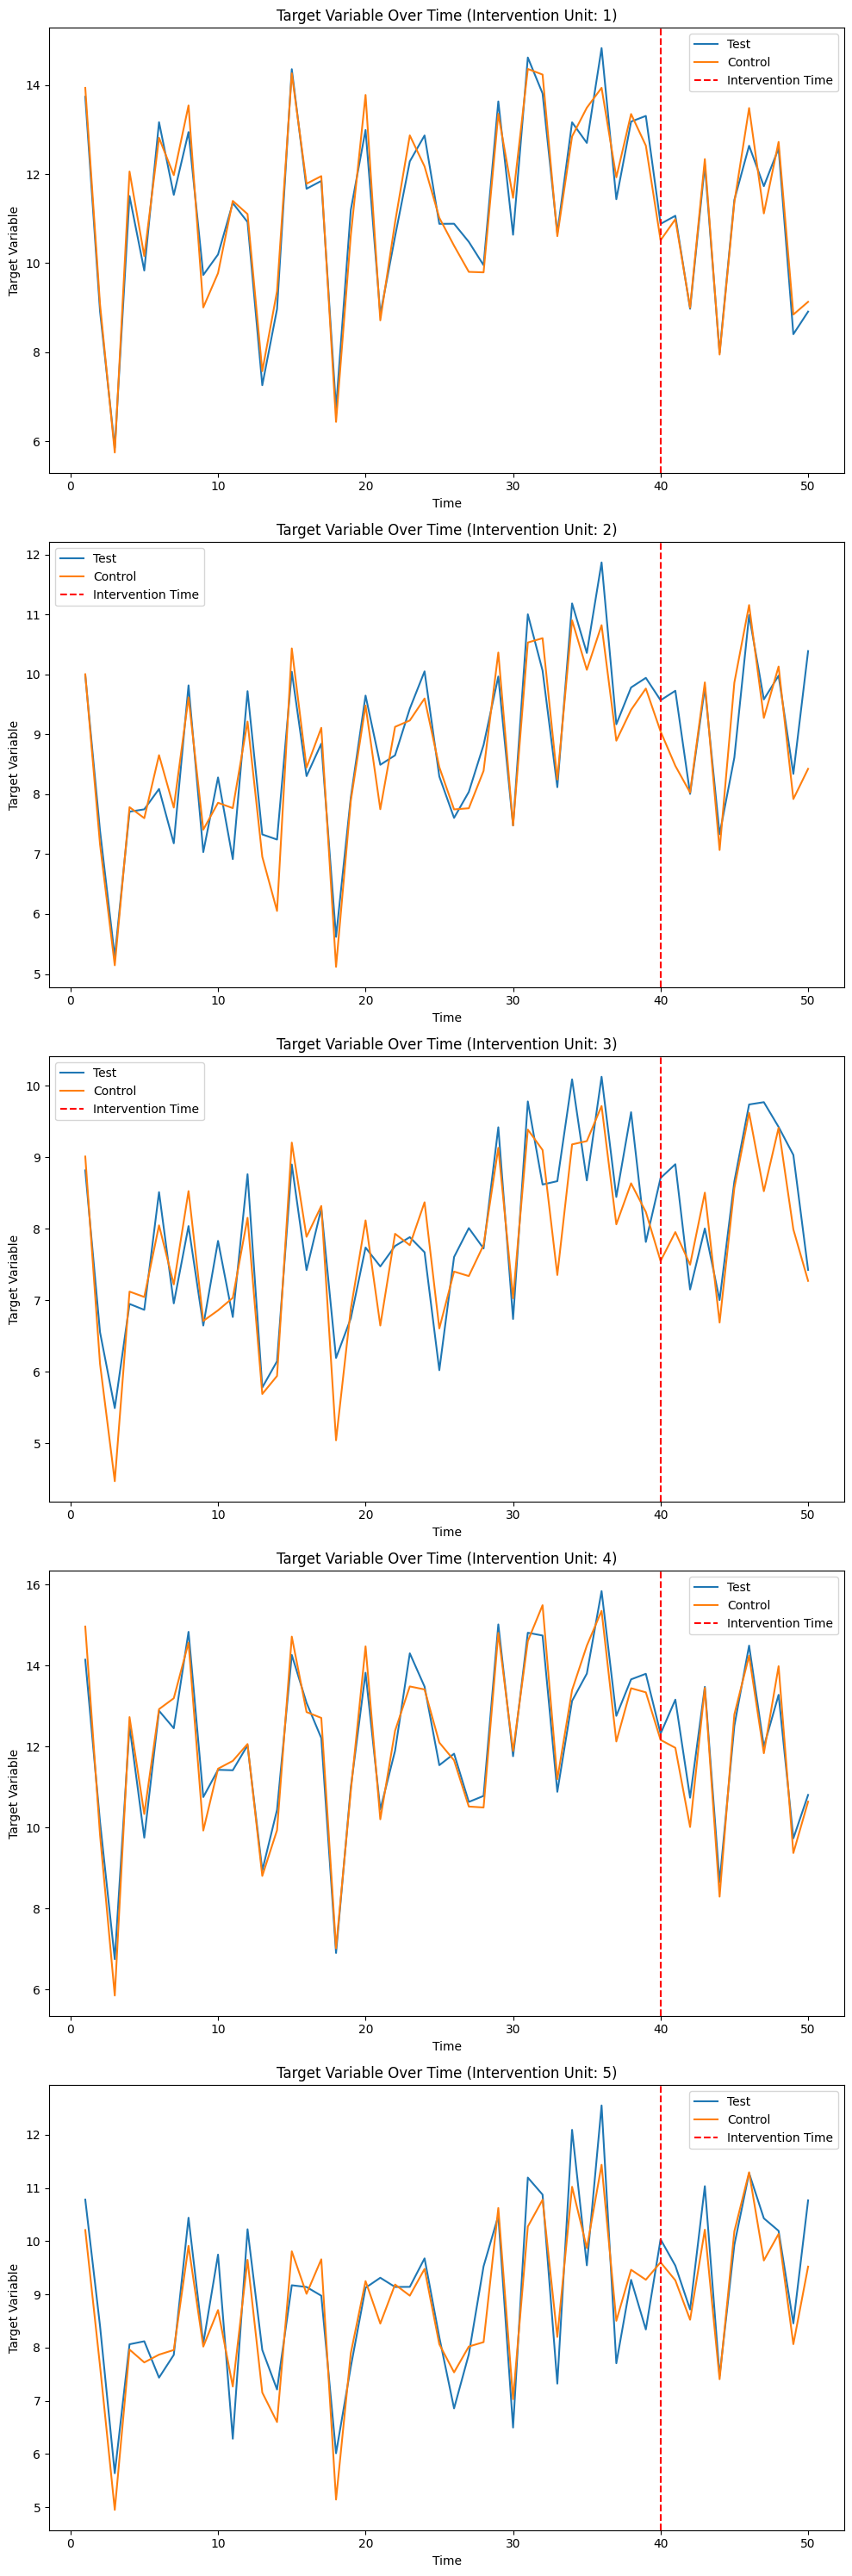

In [8]:
sc_test.plot()